In [42]:
import pandas as pd
import seaborn as sns
import arcgis
from arcgis.gis import GIS
from IPython.display import Image

%matplotlib inline

In [24]:
gis = GIS(username='dsl030_UCSDOnline')

Enter password: ········


# DSC 106 Final Project
## Intro: 
- my canadian friend tells everyone that they have to try tim hortons when they come to canada. they spread it like the gospel and now we want to see if it's really worth the hype.
- we want to see if canadians really do prefer tim hortons over a traditional favorite: starbucks. 
- we decided to narrow down to the city of toronto due to limitations of the dataset, and to remove any regional biases in opinions

## Read in data

In [15]:
starbucks = pd.read_csv('data/starbucks.csv')
horton = pd.read_csv('data/horton.csv')
reviews = pd.read_csv('data/reviews.csv')
reviews['date'] = pd.to_datetime(reviews['date'])

In [16]:
starbucks_reviews = starbucks.merge(reviews, on='business_id', how='left')
horton_reviews = horton.merge(reviews, on='business_id', how='left')

## 1. overall rating (two numbers)

In [4]:
starbucks.stars.mean()

3.365625

In [5]:
horton.stars.mean()

2.725

## 2. out of all reviews, how many were useful? (pie)

In [8]:
reviews.useful.unique()

array([ 0,  1,  3,  2,  4,  7,  5,  8,  6, 13, 25, 31, 17,  9, 10, 30, 45,
       16, 20, 58, 18, 27, 29, 28], dtype=int64)

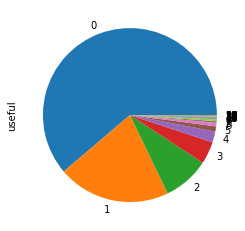

In [9]:
reviews.useful.value_counts().plot.pie(); # maybe bin the usefuls

## 3. overall rating within useful reviews (two numbers?)

In [10]:
starbucks_reviews[starbucks_reviews.useful > 0].stars_x.mean()

3.381964809384164

In [11]:
horton_reviews[horton_reviews.useful > 0].stars_x.mean()

2.790931989924433

## 4. gain in popularity? (line: date vs rating)

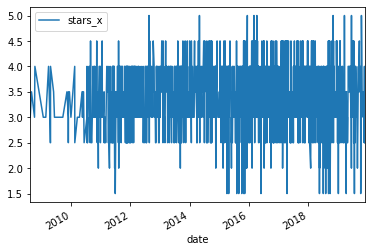

In [19]:
starbucks_reviews.sort_values(by='date').plot(x='date', y='stars_x'); # not sure if this is what you wanted

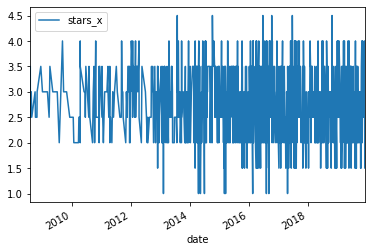

In [20]:
horton_reviews.sort_values(by='date').plot(x='date', y='stars_x'); # not sure if this is what you wanted

## 5. geodata

In [26]:
starbucks.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,17-66 Wellington Street W,"{'RestaurantsPriceRange2': '2', 'WiFi': ""'free...",CSaB0_tKunqfcOqbw5FdAw,"Food, Coffee & Tea",Toronto,"{'Monday': '5:30-19:0', 'Tuesday': '5:30-19:0'...",1,43.647923,-79.381353,Starbucks,M5J 2W4,8,4.0,ON
1,139 Yorkville Ave,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...",X6Cgn59q3i3vK-lqzVY6gQ,"Cafes, Restaurants, Food, Coffee & Tea",Toronto,NaN,1,43.745437,-79.406571,Starbucks,M5R 1C4,3,3.0,ON
2,"1 First Canadian Place, 77 Adelaide Street W","{'WiFi': ""'free'"", 'BikeParking': 'True', 'Out...",PNzGMlH0SnvIMxIESVNLgw,"Food, Coffee & Tea",Toronto,NaN,1,43.648420,-79.381900,Starbucks,M5X 1C1,3,4.0,ON
3,1606-25 The West Mall,"{'NoiseLevel': ""u'loud'"", 'Caters': 'False', '...",jVJcR4y8q7FuwlK0cYVuyw,"Restaurants, Food, Cafes, Coffee & Tea",Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1,43.612899,-79.555735,Starbucks,M9C 1B8,15,3.0,ON
4,205 Humber College Boulevard,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",POuD26KrQ_ssxKuSFfXY0A,"Coffee & Tea, Food, Bakeries",Toronto,"{'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'...",1,43.729443,-79.607311,Starbucks,M9W 5L7,6,2.5,ON


In [39]:
map1 = gis.map('Toronto', zoomlevel=11)

starbucks_sdf = pd.DataFrame.spatial.from_xy(starbucks, 'longitude', 'latitude')
starbucks_sdf.spatial.plot(map1, cmap='Set1', cstep=2)

horton_sdf = pd.DataFrame.spatial.from_xy(horton, 'longitude', 'latitude')
horton_sdf.spatial.plot(map1, cmap='Set1', cstep=0)

True

In [40]:
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)

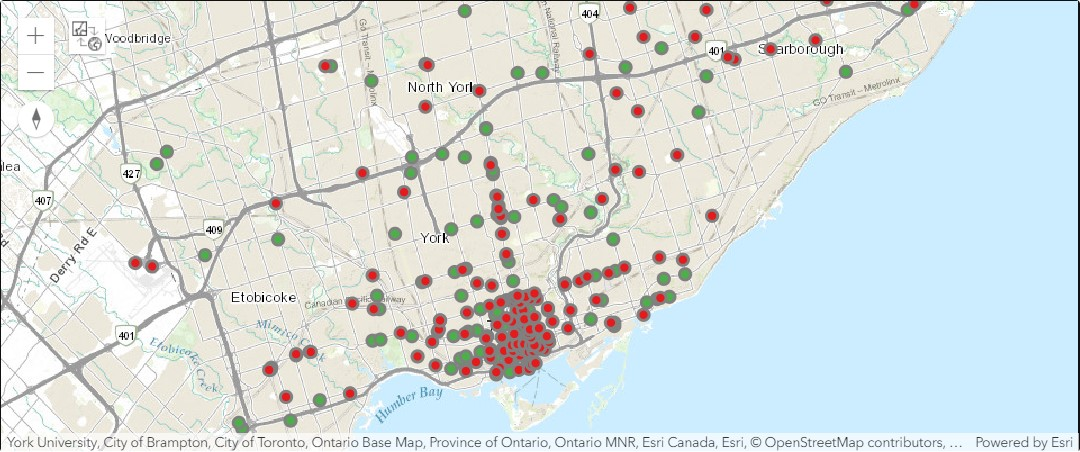

In [43]:
Image('data/map.jpg')